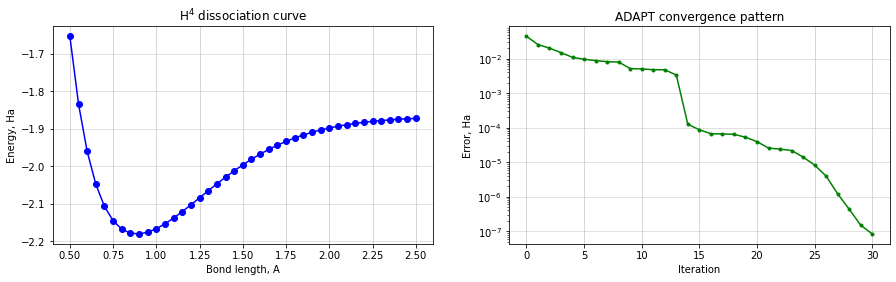

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import pickle5 as pickle




fig, plots = plt.subplots(1, 2, figsize=(15,4))


plots[0].set_title('H$^4$ dissociation curve')
plots[0].grid(axis='y', alpha=0.75)
plots[0].set_xlabel('Bond length, A')
plots[0].set_ylabel('Energy, Ha')


lengths=[]
energies=[]
dists=np.linspace(0.5,2.5,41)
for dist_num in range(len(dists)):
    dist=np.round(dists[dist_num],2)
    file = open("Bond_length_dependence.LiH_dissociation_curve_pickle_min_pool_{}".format(dist),'rb')
    myDict = pickle.load(file)[0]


    lengths.append(myDict['bond_length:'])
    energies.append(myDict['GSE:']+myDict['final_error:'])
    


plots[0].plot(lengths,energies,linestyle='-', marker='o', color='b')
plots[0].grid( linestyle = '-', linewidth = 0.5)


plots[1].set_title('ADAPT convergence pattern')
plots[1].grid(axis='y', alpha=0.75)
plots[1].set_xlabel('Iteration')
plots[1].set_ylabel('Error, Ha')



file_to_open= "slurm_0_8"
    
iteration=[]
errors=[]

file = open(file_to_open,'rb').readlines()
for line_number in range(len(file)):
    line=file[line_number].decode("utf-8")
    if len(line)>45 and line[:45]=="                         ADAPT-VQE iteration:":
        if float(file[line_number+4].decode("utf-8")[7:])>0:
            
            iteration.append(int(line[47:]))
            error_line=file[line_number+4].decode("utf-8")
            errors.append(float(error_line[7:]))



plots[1].plot(iteration,errors,linestyle='-', marker='.', color='g')
plots[1].grid( linestyle = '-', linewidth = 0.5)
plots[1].set_yscale("log")




fig.savefig('H4_8_qubits.pdf',bbox_inches = 'tight',
    pad_inches = 0)  
plt.show()


# Set a clean upper y-axis limit.
